In [42]:
# Description: this program analysis cryptocurrencies based on
# their Yahoo ticker

In [52]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('dark_background')

In [53]:
# Grab the data 
BTC = web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01',end='2021-03-14')
LTC = web.DataReader('LTC-USD', data_source='yahoo', start='2015-01-01',end='2021-03-14')
ETH = web.DataReader('ETH-USD', data_source='yahoo', start='2015-01-01',end='2021-03-14')
DOGE = web.DataReader('DOGE-USD', data_source='yahoo', start='2015-01-01',end='2021-03-14')

In [54]:
# Drop unneeded columns
BTC = BTC.drop(columns=['High', 'Low', 'Close', 'Volume','Open'])
LTC = LTC.drop(columns=['High', 'Low', 'Close', 'Volume','Open'])
ETH = ETH.drop(columns=['High', 'Low', 'Close', 'Volume','Open'])
DOGE = DOGE.drop(columns=['High', 'Low', 'Close', 'Volume','Open'])

In [55]:
# Change column headers
BTC_new = BTC.rename(columns={'Adj Close': 'BTC'})
LTC_new = LTC.rename(columns={'Adj Close': 'LTC'})
ETH_new = ETH.rename(columns={'Adj Close': 'ETH'})
DOGE_new = DOGE.rename(columns={'Adj Close': 'DOGE'})

In [56]:
# Condense to a single dataframe
CRYPTO = BTC_new
CRYPTO = CRYPTO.join(LTC_new)
CRYPTO = CRYPTO.join(ETH_new)
CRYPTO = CRYPTO.join(DOGE_new)
CRYPTO

,BTC,LTC,ETH,DOGE
Date,,,,
2015-01-01,314.248993,2.699050,NaN,0.000183
2015-01-02,315.032013,2.667360,NaN,0.000186
2015-01-03,281.082001,2.133160,NaN,0.000167
2015-01-04,264.195007,1.956680,NaN,0.000158
2015-01-05,274.473999,2.082180,NaN,0.000161
...,...,...,...,...
2021-03-10,56008.550781,200.516861,1799.166260,0.056004
2021-03-11,57805.121094,201.250336,1826.194946,0.055918
2021-03-12,57332.089844,220.829407,1772.102417,0.055349


In [57]:
# Get some statsistics on the date
CRYPTO.describe()

,BTC,LTC,ETH,DOGE
count,2337.000000,2337.000000,2113.000000,2337.000000
mean,6273.547968,51.865113,265.078277,0.003019
std,8216.151091,56.906177,328.655434,0.007621
min,178.102997,1.157010,0.434829,0.000087
25%,602.625000,3.852950,13.025200,0.000225
50%,4334.680176,43.928642,182.425018,0.002079
75%,8827.764648,69.643700,335.260071,0.002909
max,61243.085938,358.335999,1960.164795,0.078825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


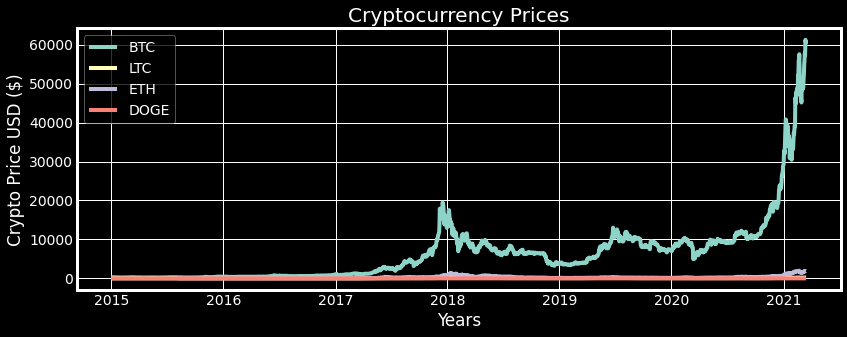

In [59]:
# Visualize and graph the cryptocurrencies prices
my_crypto = CRYPTO
plt.figure(figsize=(12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Prices')
plt.xlabel('Years')
plt.ylabel('Crypto Price USD ($)')
plt.legend(my_crypto.columns.values, loc = 'upperleft')
plt.show()

In [62]:
# Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(CRYPTO)
# Show the data
scaled

array([[  0.22295265,   0.43172752,          nan,   0.12192334],
       [  0.22423492,   0.42285525,          nan,   0.12573346],
       [  0.16863839,   0.27329439,          nan,   0.10160279],
       ...,
       [ 93.59535383,  61.50204906,  90.40365861,  70.18466552],
       [100.        ,  63.11157434,  98.18957863,  79.18032077],
       [ 98.14802183,  60.87363363,  96.08763063,  74.80636196]])

In [65]:
# Convert the scaled data into a data frame
CRYPTO_scale = pd.DataFrame(scaled, columns = CRYPTO.columns)
# Set the date as the index 
CRYPTO_scale = CRYPTO_scale.set_index(pd.DatetimeIndex(CRYPTO.index))
CRYPTO_scale

,BTC,LTC,ETH,DOGE
Date,,,,
2015-01-01,0.222953,0.431728,NaN,0.121923
2015-01-02,0.224235,0.422855,NaN,0.125733
2015-01-03,0.168638,0.273294,NaN,0.101603
2015-01-04,0.140984,0.223885,NaN,0.090172
2015-01-05,0.157817,0.259021,NaN,0.093983
...,...,...,...,...
2021-03-10,91.427927,55.815112,91.784657,71.016537
2021-03-11,94.369990,56.020464,93.163862,70.907316
2021-03-12,93.595354,61.502049,90.403659,70.184666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


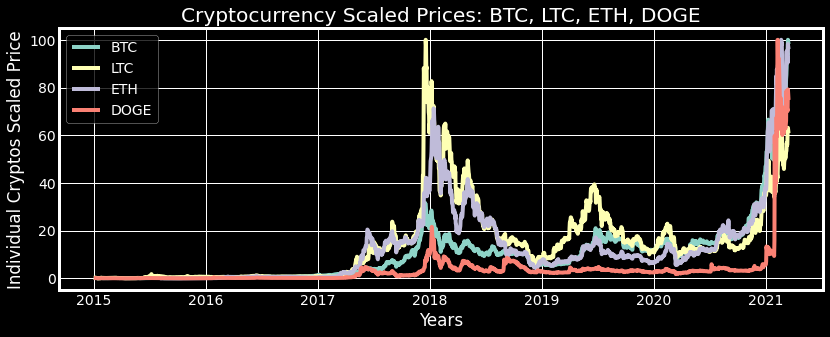

In [81]:
# Visualize and graph the cryptocurrencies prices
my_crypto = CRYPTO_scale
plt.figure(figsize=(12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Scaled Prices: BTC, LTC, ETH, DOGE')
plt.xlabel('Years')
plt.ylabel('Individual Cryptos Scaled Price')
plt.legend(my_crypto.columns.values, loc = 'upperleft')
plt.show()

In [67]:
# Get the daily simple return 
DSR = CRYPTO.pct_change(1)
# Show the data
DSR

,BTC,LTC,ETH,DOGE
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,0.002492,-0.011741,NaN,0.016393
2015-01-03,-0.107767,-0.200273,NaN,-0.102151
2015-01-04,-0.060079,-0.082732,NaN,-0.053892
2015-01-05,0.038907,0.064139,NaN,0.018987
...,...,...,...,...
2021-03-10,0.021604,-0.015326,-0.036874,-0.034381
2021-03-11,0.032077,0.003658,0.015023,-0.001536
2021-03-12,-0.008183,0.097287,-0.029620,-0.010176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


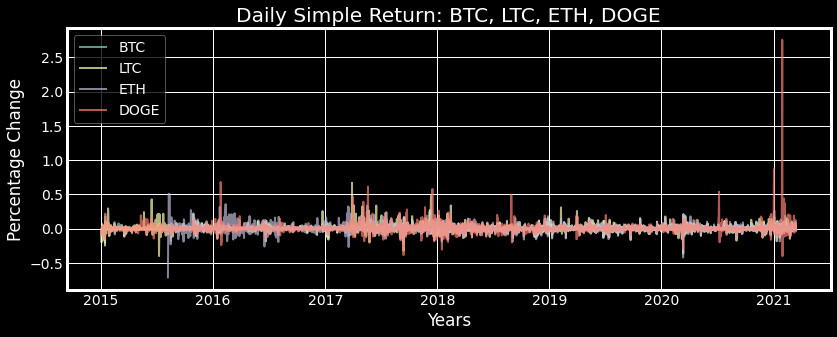

In [70]:
# Visualize and graph the cryptocurrencies prices
my_crypto = DSR
plt.figure(figsize=(12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c, alpha = 0.7, lw = 2)

plt.title('Daily Simple Return: BTC, LTC, ETH, DOGE')
plt.xlabel('Years')
plt.ylabel('Percentage Change')
plt.legend(my_crypto.columns.values, loc = 'upperleft')
plt.show()

In [71]:
# Print the cyrptocurrencies volatility 
print('The cryptocurrency volatility: ')
DSR.std()

The cryptocurrency volatility: 


BTC     0.038549
LTC     0.058027
ETH     0.064395
DOGE    0.089771
dtype: float64

In [72]:
# Show the mean/average daily simple return
DSR.mean()

BTC     0.003003
LTC     0.003499
ETH     0.005264
DOGE    0.005278
dtype: float64

In [73]:
# Get the correlation matrix
DSR.corr()

,BTC,LTC,ETH,DOGE
BTC,1.000000,0.615908,0.487095,0.366446
LTC,0.615908,1.000000,0.465961,0.325608
ETH,0.487095,0.465961,1.000000,0.249880
DOGE,0.366446,0.325608,0.249880,1.000000


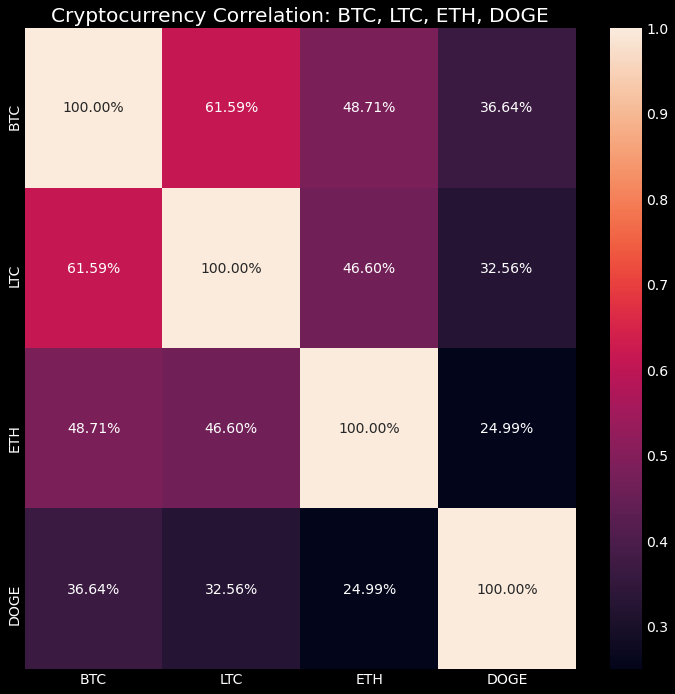

In [80]:
# Visualize DSR correlation
import seaborn as sns
plt.subplots(figsize = (11,11))
plt.title('Cryptocurrency Correlation: BTC, LTC, ETH, DOGE')
sns.heatmap(DSR.corr(), annot=True, fmt='.2%')

In [76]:
# Get and show the daily cumulative simple returns
DCSR = (DSR + 1).cumprod()
# Show the data
DCSR

,BTC,LTC,ETH,DOGE
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,1.002492,0.988259,NaN,1.016393
2015-01-03,0.894456,0.790337,NaN,0.912568
2015-01-04,0.840719,0.724951,NaN,0.863388
2015-01-05,0.873428,0.771449,NaN,0.879781
...,...,...,...,...
2021-03-10,178.229850,74.291645,649.021781,306.032787
2021-03-11,183.946878,74.563398,658.771968,305.562851
2021-03-12,182.441602,81.817458,639.258913,302.453557


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


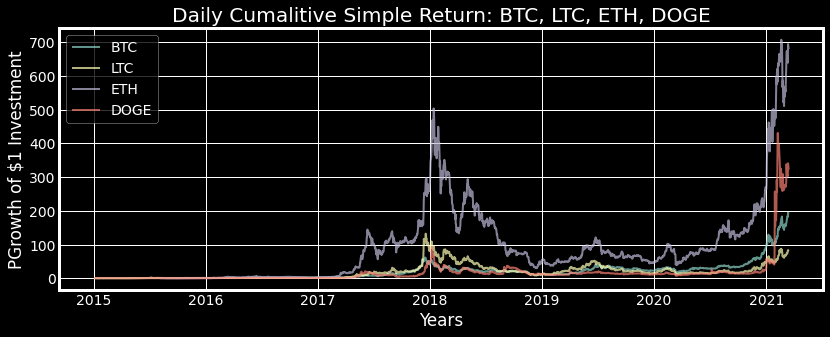

In [79]:
# Visualize DCSR
my_crypto = DCSR
plt.figure(figsize=(12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c, alpha = 0.7, lw = 2)

plt.title('Daily Cumalitive Simple Return: BTC, LTC, ETH, DOGE')
plt.xlabel('Years')
plt.ylabel('PGrowth of $1 Investment')
plt.legend(my_crypto.columns.values, loc = 'upperleft')
plt.show()